# Titanic: Machine Learning from Disaster
## Predict survival on the Titanic


We will start by importing the necesaary packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading the train.csv file into out python model

In [2]:
train=pd.read_csv("train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data preprocessing and visulalisation

The correlation between all the features can be perfectly shown in a heatmap. This visual representation is better than a numerical one. 

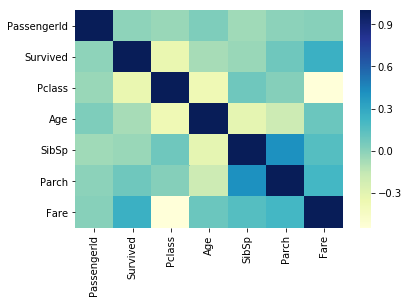

In [3]:
sns.heatmap(train.corr(),cmap="YlGnBu")

As seen from the heatmap, no feature has a high correlation with any other feature. So no major redundancy is present.

In [4]:
train.drop("Name",axis=1,inplace=True)   

In [5]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


Cabin feature have alot of null values, of 891 values only 203 are non-null values. Since it is a string value we cannot manipulate it so this feature is dropped

In [7]:
train.drop("Cabin",axis=1,inplace=True)

The "sex" feature is converted from a string into a int value. The female are represented bu 0 and the male by 1

In [8]:

for i in range(len(train)):
    if (train.loc[i,"Sex"])=="male":
        train.loc[i,"Sex"]=1
    else:
        train.loc[i,"Sex"]=0

In [9]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,0,35.0,1,0,113803,53.1000,S
4,5,0,3,1,35.0,0,0,373450,8.0500,S


A bar graph is plotted for better visual understanding of the data. 0 indicating females and 1 indicating males

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


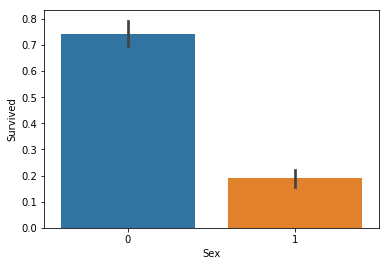

In [10]:
sns.barplot(x=train["Sex"],y=train["Survived"]) 

In [11]:
train.drop("Ticket",axis=1,inplace=True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


SibSp feature in the dataset is the number of siblings/spouses travelling with the passenger
Parch feature represents the number of parent/children travelling alone. We can combine both these features into 1 to represent total number of members of the family

In [13]:
t=[]
for i in range(len(train)):
    p=train.loc[i,"SibSp"]+train.loc[i,"Parch"]+1
    t.append(p)
train["Members"]=t


In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Members
0,1,0,3,1,22.0,1,0,7.2500,S,2
1,2,1,1,0,38.0,1,0,71.2833,C,2
2,3,1,3,0,26.0,0,0,7.9250,S,1
3,4,1,1,0,35.0,1,0,53.1000,S,2
4,5,0,3,1,35.0,0,0,8.0500,S,1


In [15]:
train.drop("SibSp",axis=1,inplace=True)

In [16]:
train.drop("Parch",axis=1,inplace=True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Members
0,1,0,3,1,22.0,7.2500,S,2
1,2,1,1,0,38.0,71.2833,C,2
2,3,1,3,0,26.0,7.9250,S,1
3,4,1,1,0,35.0,53.1000,S,2
4,5,0,3,1,35.0,8.0500,S,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
Fare           891 non-null float64
Embarked       889 non-null object
Members        891 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


As seen above, there are a few NULL values in the dataset. By some data manipulation we will set them to an arbitary value or to the arithmetic mean of other values

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Members          0
dtype: int64

In [20]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The embarked column has a few null values. We will by default set it to "S"

In [21]:
train.Embarked.fillna("S",inplace=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
Fare           891 non-null float64
Embarked       891 non-null object
Members        891 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


The age feature has alot of null values, but age is an important feature that we cannot drop. We will replace the null values with the mean of all the age.

In [23]:
a=int(train.Age.mean())
train.Age.fillna(a,inplace=True)

The embarked feature has string values, these have to be changed into int or float values. 

In [24]:
for i in range(len(train)):
    if train.loc[i,"Embarked"]== "S":
        train.loc[i,"Embarked"]=1
    if train.loc[i,"Embarked"]== "C":
        train.loc[i,"Embarked"]=2
    if train.loc[i,"Embarked"]== "Q":
        train.loc[i,"Embarked"]=3
        
train.head()        

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Members
0,1,0,3,1,22.0,7.2500,1,2
1,2,1,1,0,38.0,71.2833,2,2
2,3,1,3,0,26.0,7.9250,1,1
3,4,1,1,0,35.0,53.1000,1,2
4,5,0,3,1,35.0,8.0500,1,1


The same chages and manipulations are done to the "test.csv" file

In [25]:
test=pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age and Fare features have some null values. These will be manipulated

In [27]:
test.drop("Name",axis=1,inplace=True)

In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
l=[]
for i in range(len(test)):
    if test.loc[i,"Sex"]=="male":
        test.loc[i,"Sex"]=1
    else:
        test.loc[i,"Sex"]=0
    t=test.loc[i,"SibSp"]+test.loc[i,"Parch"]+1
    l.append(t)
test["Memebers"]=l

    
        

In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Memebers
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,3


In [31]:
test.drop("SibSp",axis=1,inplace=True)
test.drop("Parch",axis=1,inplace=True)

In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Memebers
0,892,3,1,34.5,330911,7.8292,NaN,Q,1
1,893,3,0,47.0,363272,7.0000,NaN,S,2
2,894,2,1,62.0,240276,9.6875,NaN,Q,1
3,895,3,1,27.0,315154,8.6625,NaN,S,1
4,896,3,0,22.0,3101298,12.2875,NaN,S,3


In [33]:
a=int(test.Age.mean())
test.Age.fillna(a,inplace=True)

In [34]:
f=test.Fare.mean()
test.Fare.fillna(f,inplace=True)

In [35]:
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Memebers
0,892,3,1,34.5,330911,7.8292,NaN,Q,1
1,893,3,0,47.0,363272,7.0000,NaN,S,2
2,894,2,1,62.0,240276,9.6875,NaN,Q,1
3,895,3,1,27.0,315154,8.6625,NaN,S,1
4,896,3,0,22.0,3101298,12.2875,NaN,S,3


In [36]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [37]:
for i in range(len(test)):
    if test.loc[i,"Embarked"]=="S":
        test.loc[i,"Embarked"]=1
    if test.loc[i,"Embarked"]=="C":
        test.loc[i,"Embarked"]=2
    if test.loc[i,"Embarked"]=="Q":
        test.loc[i,"Embarked"]=3
        

In [38]:
test.Embarked.value_counts()

1    270
2    102
3     46
Name: Embarked, dtype: int64

In [39]:
test.drop("Ticket",axis=1,inplace=True)
test.head()


,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Memebers
0,892,3,1,34.5,7.8292,NaN,3,1
1,893,3,0,47.0,7.0000,NaN,1,2
2,894,2,1,62.0,9.6875,NaN,3,1
3,895,3,1,27.0,8.6625,NaN,1,1
4,896,3,0,22.0,12.2875,NaN,1,3


In [40]:
test.drop("Cabin",axis=1,inplace=True)

In [41]:
test.head() 


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Memebers
0,892,3,1,34.5,7.8292,3,1
1,893,3,0,47.0,7.0000,1,2
2,894,2,1,62.0,9.6875,3,1
3,895,3,1,27.0,8.6625,1,1
4,896,3,0,22.0,12.2875,1,3


## Training and testing data

In [42]:
X_train1 = train.drop('Survived', axis=1)
X_train=  X_train1.drop("PassengerId",axis=1).copy()
y_train = train['Survived']
X_test = test.drop("PassengerId",axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

## Import ML algorithms, final model fitting and prediction

In [43]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

#### Logistic Regression

In [44]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

80.25 percent


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(clf.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)


,Feature,Correlation
4,Members,0.318354
3,Embarked,0.004157
2,Fare,-0.028632
0,Sex,-0.886778
1,Age,-2.476469


#### Support Vector Machines

In [46]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_svc)

90.12


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

76.54


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### K-nearest Neighbours

In [48]:
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (acc_knn)

84.51


#### Decision Tress

In [49]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)
print (acc_decision_tree)

97.64


#### Random Forests

In [50]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print (acc_random_forest)

97.64


#### Naive-Bayes

In [51]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (acc_gnb)

79.8


### Model accuracy

In [52]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,97.64
5,Random Forest,97.64
1,Support Vector Machines,90.12
3,KNN,84.51
0,Logistic Regression,80.25
6,Naive Bayes,79.80
2,Linear SVC,76.54


### Storing the predictions into a pandas dataframe and converting them into a .csv file for submission

In [53]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": y_pred_decision_tree
    })

In [54]:
submission.to_csv('submissionf.csv', index=False)

### Confussion Matrix

In [55]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)


Accuracy: 97 % 

Confusion Matrix in Numbers
[[541   8]
 [ 13 329]]

Confusion Matrix in Percentage
[[0.99 0.01]
 [0.04 0.96]]

